# Preprocessing

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_csv('vgsales.csv')

In [5]:
# 各カラムの欠損値の数を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
len(df[df['Publisher'].isna()])

58

In [14]:
# 欠損を新たなカテゴリとして扱う
# PublisherがNAのindex
pub_na_idx = df[df['Publisher'].isna()].index

In [17]:
# PublisherのNAをNaNという新たなカテゴリとする
df[["Publisher"]] = df[['Publisher']].fillna("NaN")

In [20]:
df = pd.read_csv('vgsales.csv')
year_na_idx = df[df['Year'].isna()].index

In [21]:
df.fillna({'Publisher': "NaN", "Year": df['Year'].median()}, inplace=True)

In [23]:
df.iloc[year_na_idx][:4]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2007.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2007.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2007.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00


In [26]:
# PublisherがNaNとunknownをconcatする
pub_nan_df = df[df['Publisher']=='NaN']
pub_unknown_df = df[df['Publisher']=='Unknown']
pub_missing_df = pd.concat([pub_nan_df, pub_unknown_df])

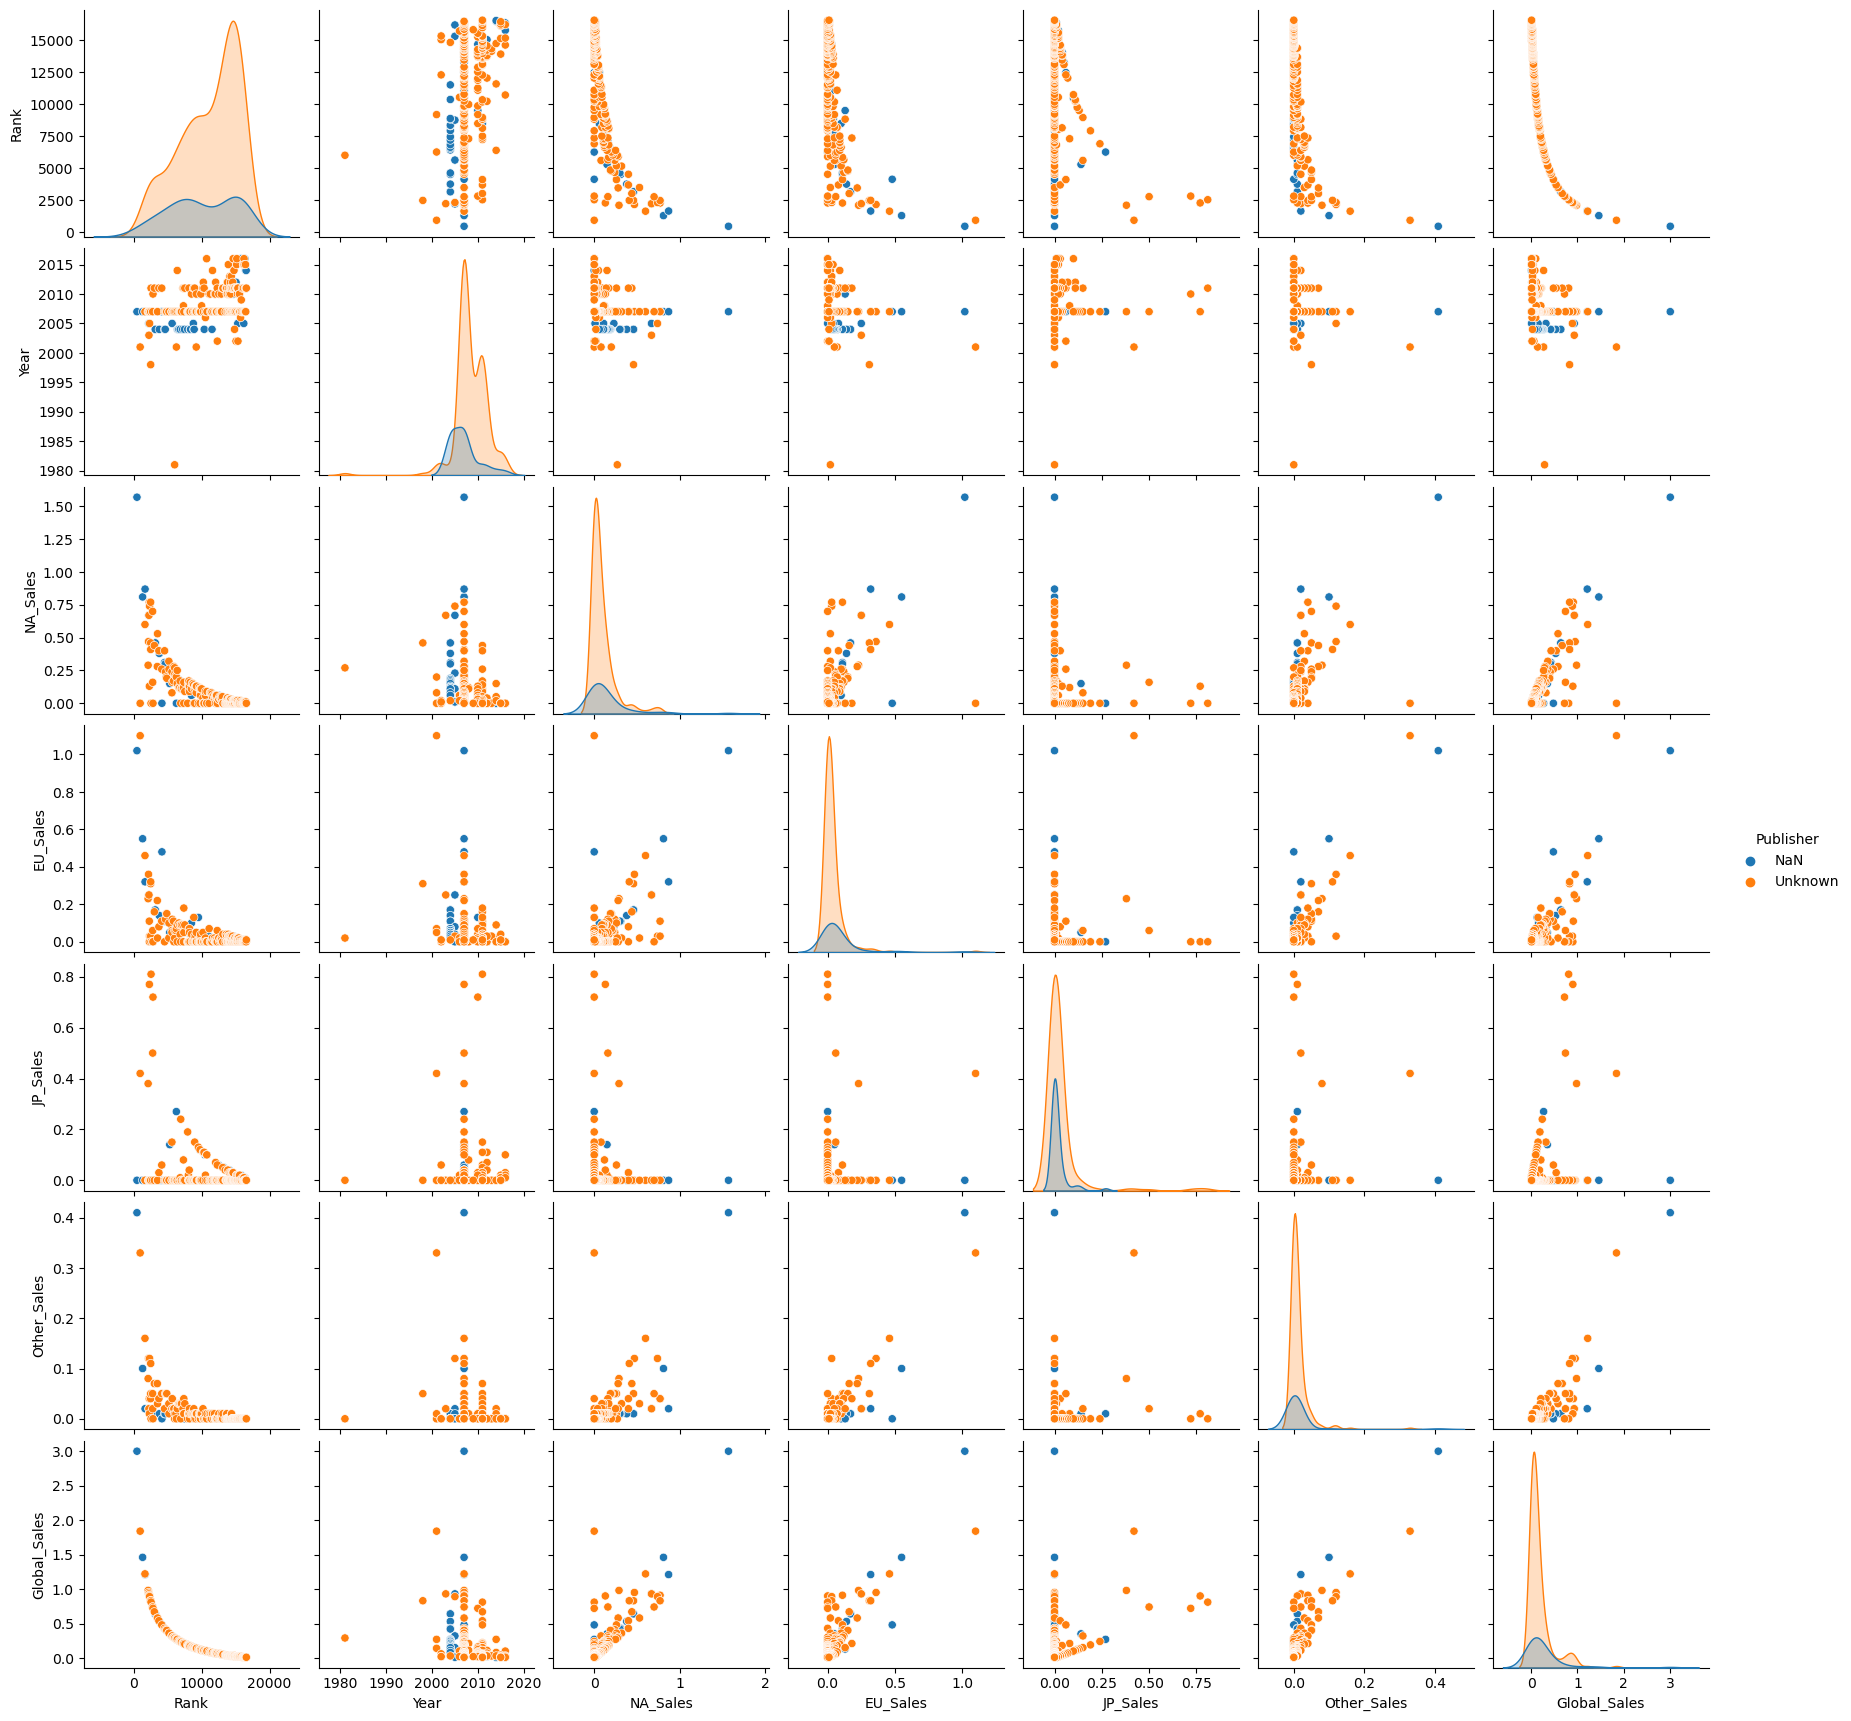

In [27]:
sns.pairplot(pub_missing_df, hue='Publisher')

In [29]:
# 欠損値を代入するためのクラスは存在する
df = pd.read_csv('vgsales.csv')
imputer = SimpleImputer(strategy='median')
df['Year'] = imputer.fit_transform(df[['Year']])

In [31]:
imputer = SimpleImputer(strategy='most_frequent')
df['Publisher'] = imputer.fit_transform(df[['Publisher']])

In [50]:
# Platformごとの中央値を取得
df = pd.read_csv('vgsales.csv')
platform_year_dict = df.groupby('Platform').median()['Year'].to_dict()

In [51]:
# Yearが欠損であればplatform_year_dictの値をPlatformに入れる 行単位で処理するためrowを指定（axis=1)
# YearがnanでなければYearを返す
df['Year'] = df.apply(lambda row: platform_year_dict[row['Platform']] 
         if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], axis=1)

In [52]:
df.iloc[year_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2005.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2005.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2009.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,1982.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,2003.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,2009.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,2011.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,2003.0,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [56]:
df = pd.read_csv('vgsales.csv')
df.drop('Global_Sales', inplace=True, axis=1)
target = 'JP_Sales'
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
platform_year_dict = X_train.groupby('Platform').median()['Year'].to_dict()
X_train['Year'] = X_train.apply(lambda row: platform_year_dict[row['Platform']] 
         if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], axis=1)
X_test['Year'] = X_test.apply(lambda row: platform_year_dict[row['Platform']] 
         if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], axis=1)